In [3]:
#Importing libraries
! pip install networkx
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Importing data
dm = pd.read_csv('companyDis.csv')
vec = pd.read_csv('vectors_inc.csv', encoding="utf-8-sig")

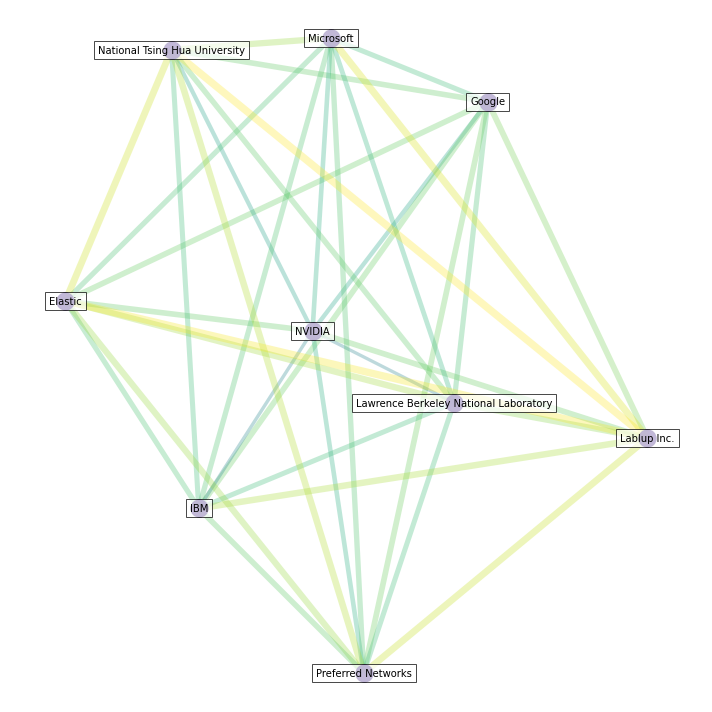

,Google,NVIDIA,Microsoft,Lawrence Berkeley National Laboratory,National Tsing Hua University,Elastic,IBM,Preferred Networks,Lablup Inc.
Google,0.000000,2.177681,2.533440,2.600907,2.787917,2.822384,2.823263,2.848352,2.941594
NVIDIA,2.177681,0.000000,2.313475,1.644294,2.125368,2.799286,1.694858,2.314324,2.845806
Microsoft,2.533440,2.313475,0.000000,2.398616,3.140265,2.616632,2.661092,2.678526,3.505720
Lawrence Berkeley National Laboratory,2.600907,1.644294,2.398616,0.000000,2.759797,3.192677,2.512974,2.528834,3.041808
National Tsing Hua University,2.787917,2.125368,3.140265,2.759797,0.000000,3.431328,2.532783,3.290767,3.717006
Elastic,2.822384,2.799286,2.616632,3.192677,3.431328,0.000000,2.628802,3.148796,3.659732
IBM,2.823263,1.694858,2.661092,2.512974,2.532783,2.628802,0.000000,2.785040,3.236730
Preferred Networks,2.848352,2.314324,2.678526,2.528834,3.290767,3.148796,2.785040,0.000000,3.394205
Lablup Inc.,2.941594,2.845806,3.505720,3.041808,3.717006,3.659732,3.236730,3.394205,0.000000


In [6]:
def SimbyDistance(name): 
  LP = list(vec.Inc.unique())
  distanceMatrix = dm.values 
  index = LP.index(name) 
  
  #Sorting the target company 8 similar counterparts 
  sortingL = []
  for i in range(0,224):
    sortingL.append((distanceMatrix[index][i],LP[i],i))
  res1 = sorted(sortingL,key=lambda x: x[0],reverse=False)[:9]
  res2 = [i[2] for i in res1]
  compName = [i[1] for i in res1]
  resMatrix = np.zeros((len(res2), len(res2)))
  for i in range(0,len(res2)):
    for j in range(0,len(res2)):
      resMatrix[i][j] = distanceMatrix[res2[i]][res2[j]]
  forComp = pd.DataFrame(resMatrix,compName,compName)
  
  # Generating network graph
  dist_df = forComp
  G = nx.Graph()
  for i, row_i in dist_df.iterrows():
    for j, row_j in dist_df.iterrows():
        G.add_edge(i,j,weight=dist_df.loc[i][j]*2)

  pos = nx.kamada_kawai_layout(G)
  edges = G.edges()
  weights = [G[u][v]['weight'] for u,v in edges]
  cmap = 'bwr'

  fig, ax = plt.subplots(figsize=(10, 10))
  # Visualize graph components
  nx.draw_networkx_edges(G, pos, alpha=0.3, width=weights, edge_color=weights)
  nx.draw_networkx_nodes(G, pos, node_color="#210070", alpha=0.9)
  label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
  nx.draw_networkx_labels(G, pos, font_size=10, bbox=label_options)

  # Resize figure for label readibility
  ax.margins(0.1, 0.05)
  fig.tight_layout()
  plt.axis("off")
  plt.show()
  return forComp
 

SimbyDistance('Google')